In [267]:
import nltk
import string
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB 
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [128]:
df = pd.read_csv('spam (or) ham.csv')
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Data Cleaning

In [129]:
df.isnull().sum()

Class    0
sms      0
dtype: int64

In [130]:
df.duplicated().sum()

403

In [131]:
df.drop_duplicates(keep='first')

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [132]:
Encoder = LabelEncoder()
df['Class'] = Encoder.fit_transform(df['Class'])

# EDA

In [133]:
df['Class'].value_counts()

0    4825
1     748
Name: Class, dtype: int64

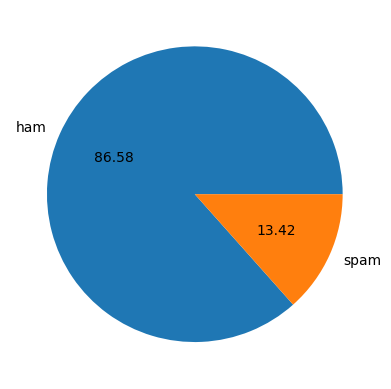

In [134]:
plt.pie(df['Class'].value_counts(),labels=['ham' , 'spam'] , autopct='%0.2f')
plt.show()

* Imbalanced data 

In [135]:
df['char_count']=df['sms'].apply(len)
df.head()

,Class,sms,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [136]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
df['word_count'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sent_count'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [138]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5573.000000,5573.000000,5573.000000
mean,80.504576,18.845326,2.006460
std,59.947472,13.852395,1.540071
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


* Ham SMS 

In [139]:
df[df['Class']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4825.000000,4825.000000,4825.000000
mean,71.482487,17.425699,1.846010
std,58.440652,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


* Spam sms

In [140]:
df[df['Class']== 1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,748.000000,748.000000,748.000000
mean,138.701872,28.002674,3.041444
std,28.866876,6.860632,1.547860
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot: xlabel='char_count', ylabel='Count'>

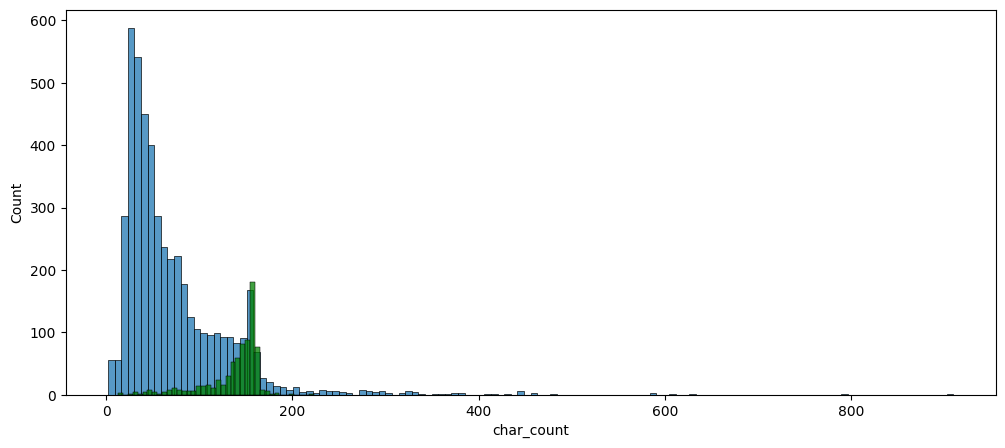

In [141]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Class']== 0]['char_count'])
sns.histplot(df[df['Class']== 1]['char_count'] , color= 'green')


<AxesSubplot: xlabel='word_count', ylabel='Count'>

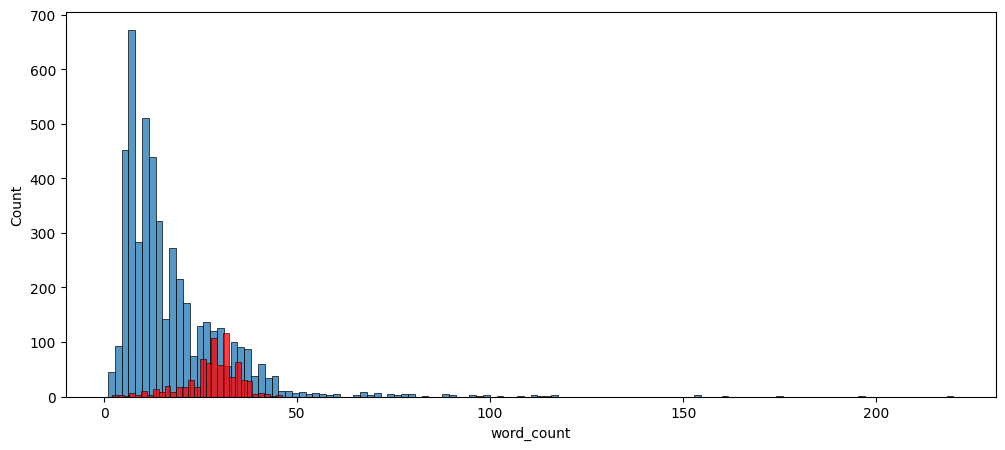

In [142]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Class']== 0]['word_count'])
sns.histplot(df[df['Class']== 1]['word_count'] , color= 'red')

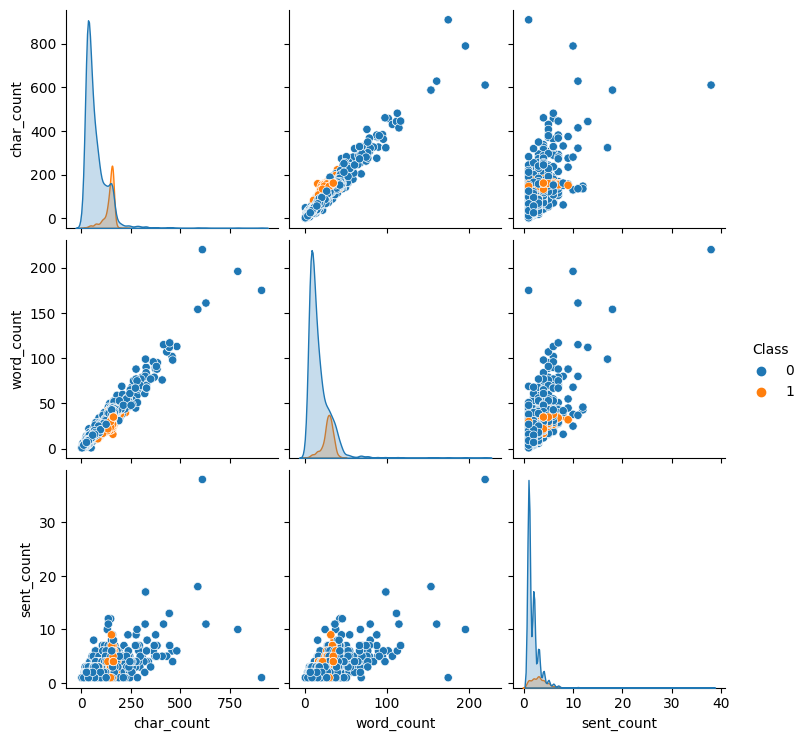

In [143]:
sns.pairplot(df , hue='Class')

/tmp/ipykernel_1441/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

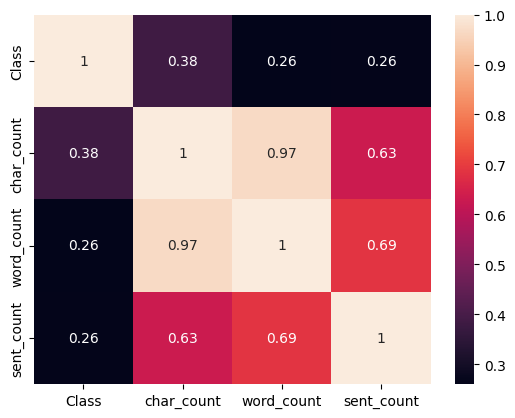

In [144]:
sns.heatmap(df.corr(), annot=True)

* Here due to multicolinearity, only one column will be choosen which have high corelation with predited column i.e. class

In [309]:
df.head()

,Class,sms,char_count,word_count,sent_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Data Preprocessing

* Tokenize
* Remove special char
* Remove stop words and punctuation
* Stemming

In [145]:
ps = PorterStemmer()

In [289]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]  #--> clone the list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [148]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/yash/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [290]:
df['transform_text'] = df['sms'].apply(transform_text)

In [291]:
df[df['Class']==1]['transform_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
5572    2nd time tri 2 contact u pound prize 2 claim e...
Name: transform_text, Length: 748, dtype: object

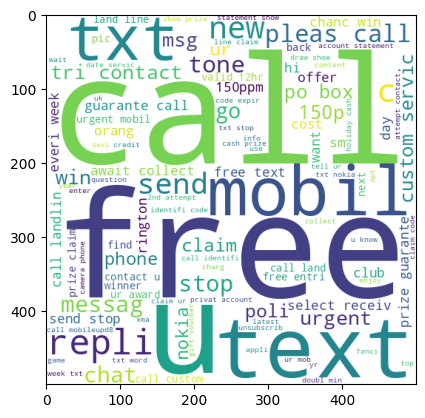

In [292]:
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')
fig =  wc.generate(df[df['Class']==1]['transform_text'].astype('str').str.cat(sep=" "))
plt.imshow(fig)

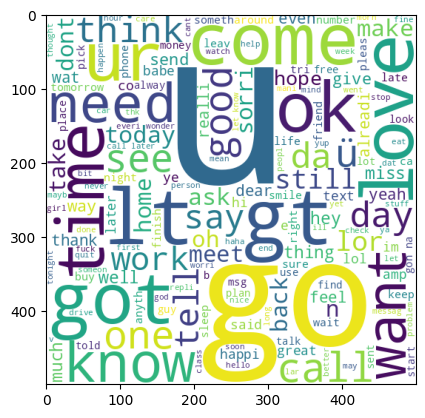

In [293]:
fig =  wc.generate(df[df['Class']== 0 ]['transform_text'].astype('str').str.cat(sep=" "))
plt.imshow(fig)

In [294]:
spam_corpus = []
for msg in df[df['Class'] == 1 ]['transform_text'].astype('str').tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [295]:
len(spam_corpus)

11561

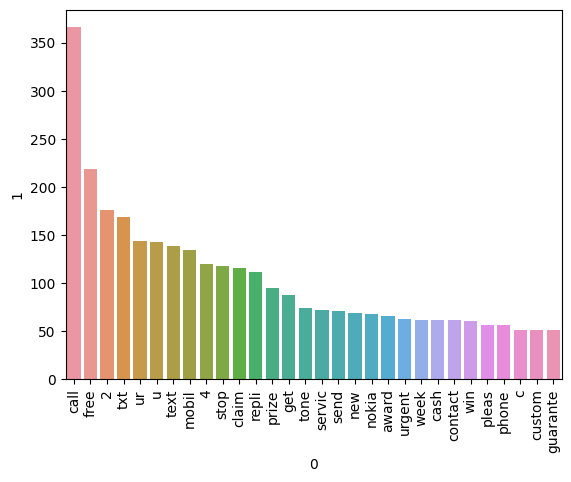

In [296]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [297]:
ham_corpus = []
for msg in df[df['Class'] == 0 ]['transform_text'].astype('str').tolist():
    for words in msg.split():
        ham_corpus.append(words)

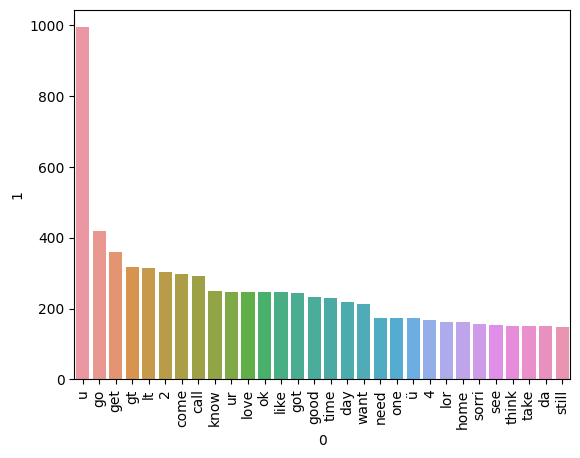

In [298]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [299]:
# cv = CountVectorizer()   
cv = TfidfVectorizer( max_features=3000)

In [300]:
x = cv.fit_transform(df['transform_text'].astype('str'))

In [301]:
scaler = MinMaxScaler()
# x = scaler.fit_transform(x.toarray())

In [302]:
x.shape

(5573, 3000)

In [303]:
y = df['Class'].values

In [304]:
x_train , x_test , y_train , y_test = train_test_split( x.toarray() , y , test_size=.2 ,random_state=42)

In [305]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
mnb = MultinomialNB()
mnb.fit(x_train , y_train)
bnb = BernoulliNB()
bnb.fit(x_train , y_train)

BernoulliNB()

In [306]:
y_pred = gnb.predict(x_test)
print(f'accuracy_score= {accuracy_score(y_test , y_pred)}')
print(f'{confusion_matrix(y_test , y_pred)} = confusion_matrix')
print(f'precision_score = {precision_score(y_test , y_pred)}')

accuracy_score= 0.8573991031390135
[[819 139]
 [ 20 137]] = confusion_matrix
precision_score = 0.4963768115942029


In [307]:
y_pred = mnb.predict(x_test)
print(f'accuracy_score= {accuracy_score(y_test , y_pred)}')
print(f'{confusion_matrix(y_test , y_pred)} = confusion_matrix')
print(f'precision_score = {precision_score(y_test , y_pred)}')

accuracy_score= 0.9775784753363229
[[956   2]
 [ 23 134]] = confusion_matrix
precision_score = 0.9852941176470589


In [308]:
y_pred = bnb.predict(x_test)
print(f'accuracy_score= {accuracy_score(y_test , y_pred)}')
print(f'{confusion_matrix(y_test , y_pred)} = confusion_matrix')
print(f'precision_score = {precision_score(y_test , y_pred)}')

accuracy_score= 0.9865470852017937
[[957   1]
 [ 14 143]] = confusion_matrix
precision_score = 0.9930555555555556


In [310]:
import pickle 
pickle.dump(cv , open('TfidfVectorizer.pkl','wb'))
pickle.dump(bnb , open('mode.pkl' , 'wb'))